## Project - Stats Hands On

#### Data Description:

###### Context:

Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

#### Attribute Information:

###### age: age of primary beneficiary

###### sex: insurance contractor gender, female, male

###### bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

###### children: Number of children covered by health insurance / Number of dependents

###### smoker: Smoking

###### region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

###### expenses: Individual medical costs billed by health insurance.

#### Learning Outcomes:

     Exploratory Data Analysis
     Practicing statistics using Python
     Hypothesis testing

#### Objective:

###### We want to see if we can dive deep into this data to find some valuable insights.

##### Steps and tasks:

- Import the necessary libraries (2 marks)
- Read the data as a data frame (2 marks)
- Perform basic EDA which should include the following and print out your insights at every step. (28 marks)

a. Shape of the data (2 marks)

b. Data type of each attribute (2 marks)

c. Checking the presence of missing values (3 marks)

d. 5 point summary of numerical attributes (3 marks)

e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. (4 marks)

f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns (2 marks)

g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns (4 marks)

h. Distribution of categorical columns (include children) (4 marks)

i. Pair plot that includes all the columns of the data frame (4 marks) 

- Answer the following questions with statistical evidence (28 marks)

a. Do charges of people who smoke differ significantly from the people who don't? (7 marks)

b. Does bmi of males differ significantly from that of females? (7 marks)

c. Is the proportion of smokers significantly different in different genders? (7

marks)

d. Is the distribution of bmi across women with no children, one child and two children, the same? (7 marks)

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, stats
from math import sqrt
from numpy import mean, var

In [3]:
data = pd.read_csv("insurance.csv")

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
data.shape

(1338, 7)

###### b. Data Type of each attribute

In [6]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
expenses    1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


###### c. missing values

In [10]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [11]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [12]:
#d 5 point summary
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [14]:
from numpy import percentile

NewData = data.loc[:,['age','bmi','children','expenses']]

quartiles = percentile(NewData, [25,50,75])
quartiles

array([ 13.25  ,  32.5   , 328.4675])

In [15]:
NewData.min()

age           18.00
bmi           16.00
children       0.00
expenses    1121.87
dtype: float64

In [17]:
NewData.max()

age            64.00
bmi            53.10
children        5.00
expenses    63770.43
dtype: float64

In [19]:
#distribution of columns - bmi, age and expenses
DistData = data.loc[:,['bmi','age','expenses']]
DistData.head()

,bmi,age,expenses
0,27.9,19,16884.92
1,33.8,18,1725.55
2,33.0,28,4449.46
3,22.7,33,21984.47
4,28.9,32,3866.86


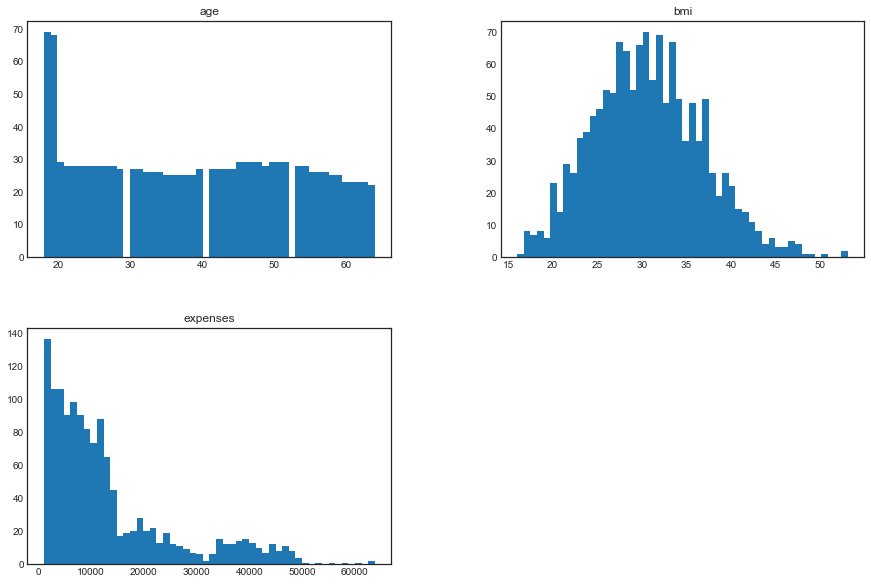

In [26]:
plt.style.use('seaborn-white')
DistData.hist(bins = 50, figsize =(15,10), grid = False)
plt.show()

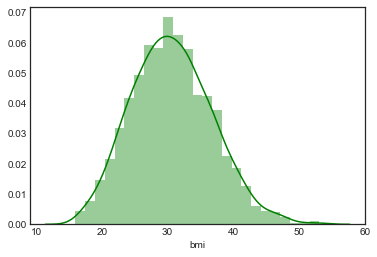

In [28]:
sns.distplot(DistData["bmi"], color = 'green')
plt.show()

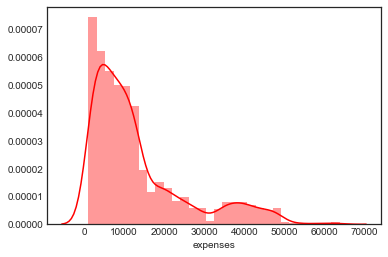

In [31]:
sns.distplot(DistData["expenses"], color = 'red')
plt.show()

In [29]:
#f. Skewness
DistData.skew()

bmi         0.284593
age         0.055673
expenses    1.515880
dtype: float64

In [32]:
#g. outliers
DistData.shape

(1338, 3)

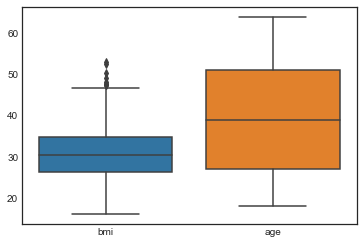

In [38]:
sns.boxplot(data = data.loc[:,['bmi','age']])

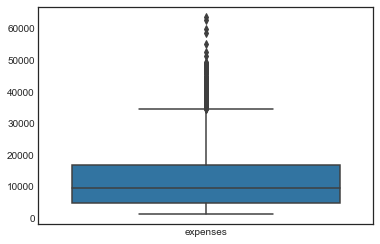

In [39]:
sns.boxplot(data = data.loc[:,['expenses']])

In [40]:
from scipy import stats
z = np.abs(stats.zscore(DistData))
print(z)

[[0.4536457  1.43876426 0.29858346]
 [0.51418574 1.50996545 0.95368938]
 [0.38295436 0.79795355 0.72867485]
 ...
 [1.02270734 1.50996545 0.96159654]
 [0.79812808 1.29636188 0.93036111]
 [0.25679863 1.55168573 1.31105343]]


In [41]:
threshold = 3
print(np.where(z > 3))

(array([  34,  116,  543,  577,  819,  847, 1047, 1146, 1230, 1300, 1317]), array([2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0]))


In [42]:
print(z[34][2])
print(z[116][0])

3.1328061331764863
3.0239859154077884


In [43]:
DistData_without_outlier = DistData[(z < 3).all(axis=1)]

In [44]:
DistData.shape

(1338, 3)

In [45]:
DistData_without_outlier.shape

(1327, 3)

In [47]:
#Outlier Treatement Using IQR Method
#DistData_without_outlierIQR = DistData[~((DistData < (Q1 - 1.5 * IQR))|(DistData > (Q3 + 1.5 * IQR))).any(axis=1)]

In [48]:
#h. categorical
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [49]:
ds = data.copy()
ds.drop(["expenses", "age", "bmi"], axis = 1, inplace = True)
ds.head()

,sex,children,smoker,region
0,female,0,yes,southwest
1,male,1,no,southeast
2,male,3,no,southeast
3,male,0,no,northwest
4,male,0,no,northwest


In [50]:
ds['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

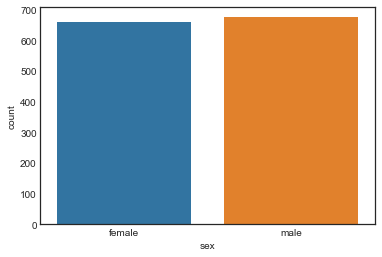

In [51]:
sns.countplot(x='sex', data = ds)

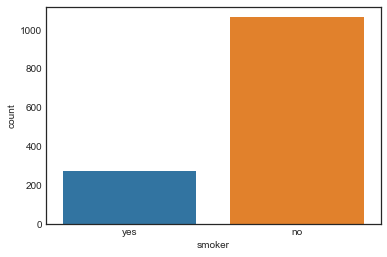

In [52]:
sns.countplot(x='smoker', data = ds)

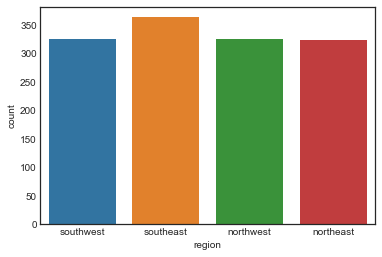

In [53]:
sns.countplot(x='region', data = ds)

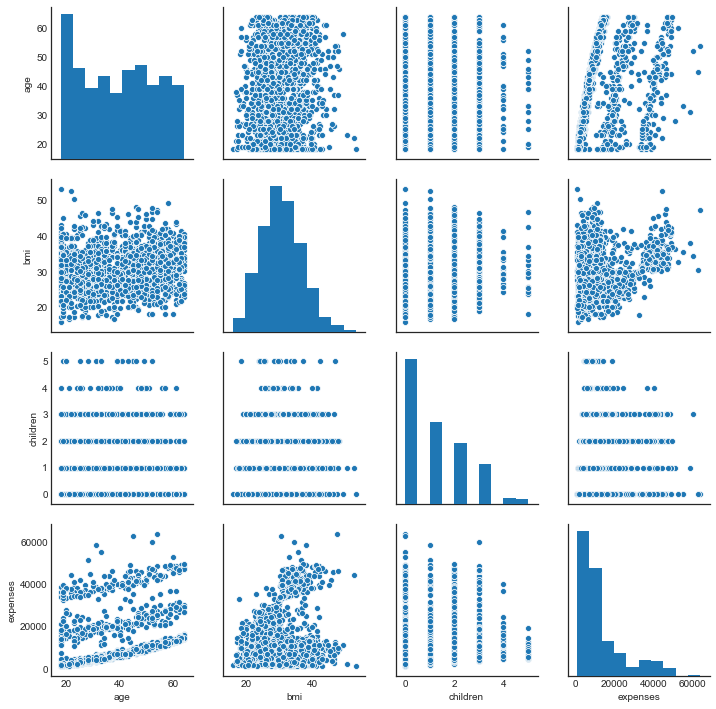

In [54]:
#i. pair plot

pplt = sns.pairplot(data)

a. Do charges of people who smoke differ significantly from the people who don't? (7 marks)

b. Does bmi of males differ significantly from that of females? (7 marks)

c. Is the proportion of smokers significantly different in different genders? (7

marks)

d. Is the distribution of bmi across women with no children, one child and two children, the same? (7 marks)

steps: 
filter separately for smokers and non smokers
plot distribution
frame hypotheses - null, alternate


In [ ]:
# statistic, pvalue = stats.ttest_ind(nonsmoker['charges'], smoker['charges'], equal_var = False)
# print("t-stat: {} and pvalue: {}".format(statistic,pvalue)

#c.
Null: Not significantly different
Alt. : Significantly different

In [55]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [56]:
female_smokers = (data['sex'] == 'female') & (data['smoker'] == 'yes')
female_smokers

0        True
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337     True
Length: 1338, dtype: bool

In [57]:
female_smokers.value_counts()

False    1223
True      115
dtype: int64

In [58]:
male_smokers = (data['sex'] == 'male') & (data['smoker'] == 'yes')
male_smokers.value_counts()

False    1179
True      159
dtype: int64

In [59]:
#proportion of smokers based on gender
#Female

115/1338 * 100

8.594917787742899

In [60]:
#Male
159/1338 * 100

11.883408071748878

#d. bmi of female with 0,1 and 2 children

Null: All BMI are same
Alt: All BMI are not same

In [70]:
#data_copy = data[data['children'] < 3]
data_copy = data[(data['sex'] == 'female') & (data['children'] < 3)]
data_copy.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
9,60,female,25.8,0,no,northwest,28923.14
11,62,female,26.3,0,yes,southeast,27808.73


In [71]:
data_copy.shape

(566, 7)

Text(0.5, 1.0, 'Distribution of BMI across women with no child, 1 children and 2 children')

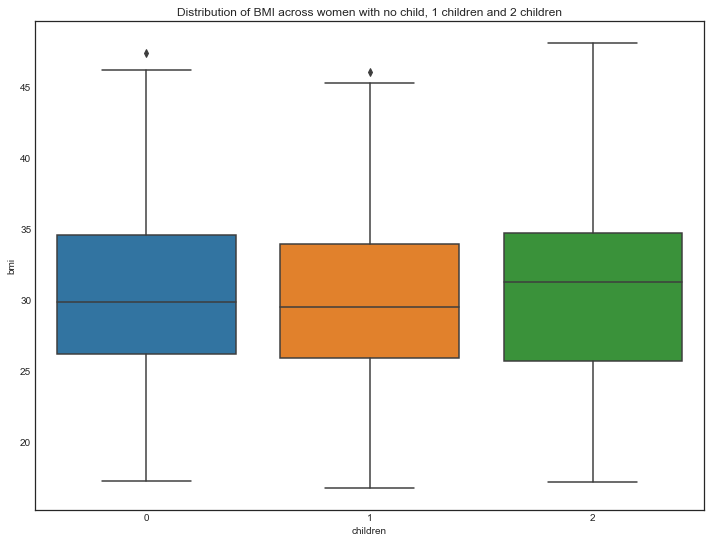

In [72]:
plt.figure(figsize=(12,9))
sns.boxplot(x = data_copy['children'], y = data_copy['bmi'], data = data_copy)
plt.title("Distribution of BMI across women with no child, 1 children and 2 children")